# Calculation of linear model for porosity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use("ggplot")

In [2]:
raw = pd.read_csv("porosity.csv", 
                  names=["dry", "wet", "void"],
                  header=0)
raw["wetSqd"] = raw["wet"]**2
raw.describe()

,dry,wet,void,wetSqd
count,11.000000,11.000000,11.000000,1.100000e+01
mean,1106.636364,1016.272727,0.517218,1.032938e+06
std,40.438281,11.858254,0.156935,2.422004e+04
min,1034.000000,1005.000000,0.282700,1.010025e+06
25%,1082.500000,1008.000000,0.377200,1.016064e+06
50%,1121.000000,1012.000000,0.586900,1.024144e+06
75%,1124.500000,1022.500000,0.641000,1.045562e+06
max,1179.000000,1036.000000,0.716500,1.073296e+06


## Conduct a linear regression on wet density

slope: -0.007526    intercept: 8.165275


Text(0, 0.5, 'Void volume fraction')

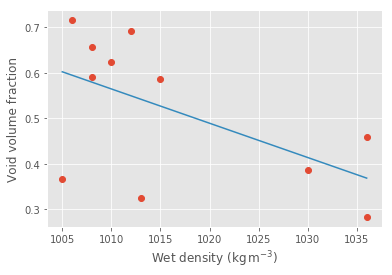

In [3]:
slope, intercept, r_value, p_value, std_err = stats.linregress(raw["wet"], raw["void"])
print("slope: %f    intercept: %f" % (slope, intercept))


plt.plot(raw["wet"], raw["void"], 'o')
plt.plot(raw["wet"], intercept + raw["wet"]*slope)
plt.xlabel("Wet density ($\mathrm{kg\, m^{-3}}$)")
plt.ylabel("Void volume fraction")

We will therefore describe the porosity as a linear model of wet density.

The equation we will use is 

$$
\epsilon = 8.17 - 7.5\times 10^{-3} \rho_{wet}
$$

## Linear regression on a 2nd order polynomial on wet density

In [4]:
from sklearn import linear_model

In [5]:
X = raw[["wet", "wetSqd"]].copy()
y = raw["void"]

lm = linear_model.LinearRegression()
model = lm.fit(X, y)

icept = model.intercept_
coeffs = model.coef_
print(model.coef_, model.intercept_)



[ 3.98707710e-01 -1.98894919e-04] -199.23241596609617


Text(0, 0.5, 'Void volume fraction')

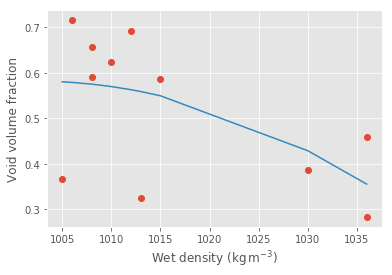

In [6]:
plt.plot(raw["wet"], raw["void"], 'o')
plt.plot(raw["wet"], icept + coeffs[0]*X["wet"] + X["wetSqd"]*coeffs[1])
plt.xlabel("Wet density ($\mathrm{kg\, m^{-3}}$)")
plt.ylabel("Void volume fraction")

## Decision of the model

We will use a linear model for this, as it seems to predict better the porosity from the wet density values. We could do exponential decay, but this would lead to numerical problems as the void volume fraction passes 1 at low wet densities. I will nonetheless constrain the void volume fraction to 0.99 and 0.01 so that we don't get any numerical problems. 

We will use a fixed wet density, so therefore a fixed void fraction. In reality, this would not be the case.

In [7]:
eps_1010 = intercept + 1010*slope

In [8]:
print(f"The value of the void fractio at 1010 kg/m3 is {eps_1010:.4f}")

The value of the void fractio at 1010 kg/m3 is 0.5644


## Testing of ICs for the biofilm

I want a nice sinusoidal wave for the biofilm. Here I will develop the expression. It will be defined on the X-Z plane


In [129]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

X = np.linspace(0, 3.0e-3, 100)
Z = X
xx, zz = np.meshgrid(X, Z, sparse=True)

Y = np.sin(5000*xx)/5000 + np.sin(5000*zz)/5000

Text(0.5, 0.92, 'surface')

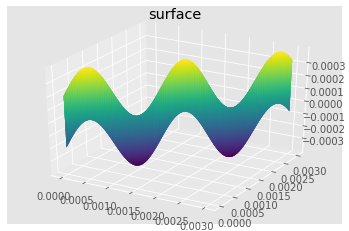

In [130]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Z, Y, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface')

In [137]:
sml = 1/3000*np.sin(7000*X)
sml_cpy = sml.copy()
sml_cpy = sml_cpy.clip(min=0)
        


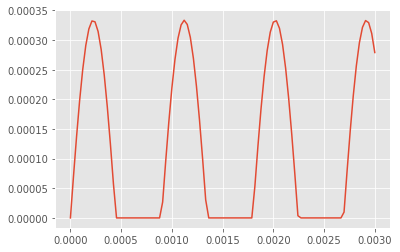

In [138]:
plt.plot(X, sml_cpy)